In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**J'ai partager avec vous un dossier "Ai_Advanced". Pour tester le code il suffit d'aller au dossier "Ai_Advanced" qui est situé dans le dossier "partagés avec moi" de votre drive et d'ajouter ce dossier comme raccourci à votre drive.**

 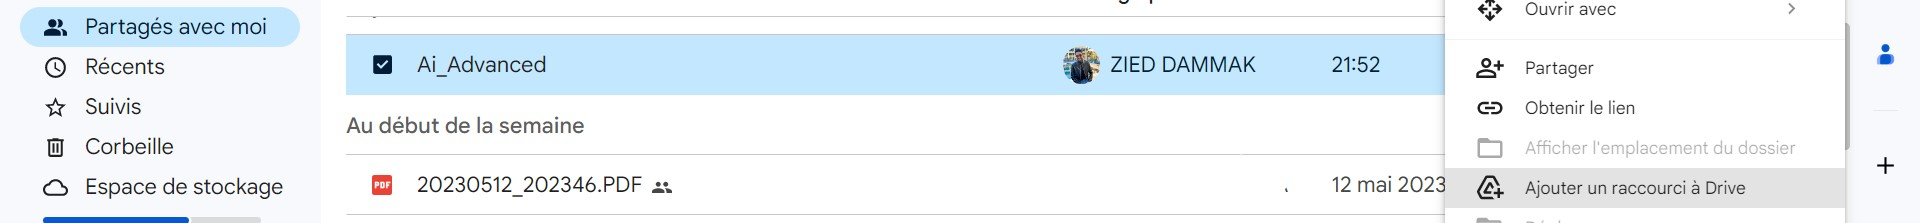

In [ ]:
%cd /content/gdrive/MyDrive/Ai_Advanced

/content/gdrive/.shortcut-targets-by-id/1TkrCqYv2dqGlJwqD0Llx4e8H5UHjgzKe/Ai_Advanced


Gender: Male
Age: 21-25 years


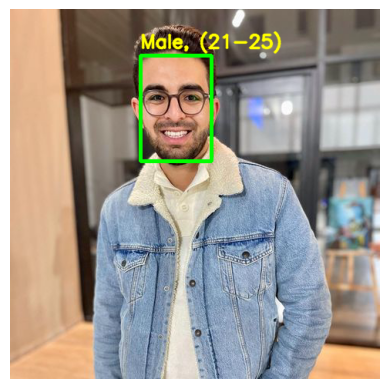

Gender: Male
Age: 21-25 years


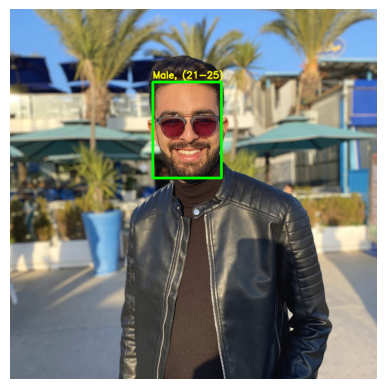

Gender: Male
Age: 21-25 years


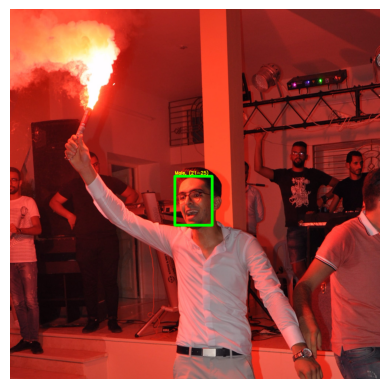

Gender: Male
Age: 48-53 years


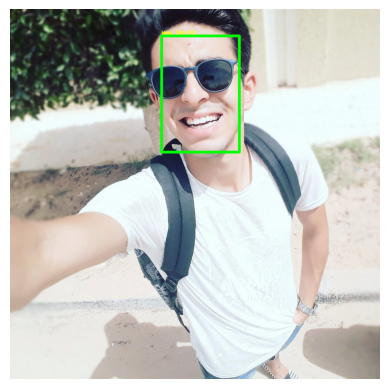

In [ ]:
import cv2
import math
import argparse
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections=net.forward()
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes


parser=argparse.ArgumentParser()
parser.add_argument('--image')

args = argparse.Namespace(image="zied.jpg")
args2 = argparse.Namespace(image="zied2.jpg")
args3 = argparse.Namespace(image="zied3.jpg")
args4 = argparse.Namespace(image="zied4.jpg")

faceProto="opencv_face_detector.pbtxt"
faceModel="opencv_face_detector_uint8.pb"
ageProto="age_deploy.prototxt"
ageModel="age_net.caffemodel"
genderProto="gender_deploy.prototxt"
genderModel="gender_net.caffemodel"

MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(21-25)', '(27-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']

faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

video=cv2.VideoCapture(args.image if args.image else 0)
video2=cv2.VideoCapture(args2.image if args2.image else 0)
video3=cv2.VideoCapture(args3.image if args2.image else 0)
video4=cv2.VideoCapture(args4.image if args2.image else 0)
padding=20
for i in range(5):
  if i==1 :
    while cv2.waitKey(1)<0:
        hasFrame,frame=video.read()
        if not hasFrame:
            cv2.waitKey()
            break

        resultImg,faceBoxes=highlightFace(faceNet,frame)
        if not faceBoxes:
            print("No face detected")

        for faceBox in faceBoxes:
            face=frame[max(0,faceBox[1]-padding):
                      min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                      :min(faceBox[2]+padding, frame.shape[1]-1)]

            blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
            genderNet.setInput(blob)
            genderPreds=genderNet.forward()
            gender=genderList[genderPreds[0].argmax()]
            print(f'Gender: {gender}')

            ageNet.setInput(blob)
            agePreds=ageNet.forward()
            age=ageList[agePreds[0].argmax()]
            print(f'Age: {age[1:-1]} years')

            cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
            resultImgRGB = cv2.cvtColor(resultImg, cv2.COLOR_BGR2RGB)
            plt.imshow(resultImgRGB)
            plt.axis('off')
            plt.show()
  if i==2 :
    while cv2.waitKey(1)<0:
        hasFrame,frame=video2.read()
        if not hasFrame:
            cv2.waitKey()
            break

        resultImg,faceBoxes=highlightFace(faceNet,frame)
        if not faceBoxes:
            print("No face detected")

        for faceBox in faceBoxes:
            face=frame[max(0,faceBox[1]-padding):
                      min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                      :min(faceBox[2]+padding, frame.shape[1]-1)]

            blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
            genderNet.setInput(blob)
            genderPreds=genderNet.forward()
            gender=genderList[genderPreds[0].argmax()]
            print(f'Gender: {gender}')

            ageNet.setInput(blob)
            agePreds=ageNet.forward()
            age=ageList[agePreds[0].argmax()]
            print(f'Age: {age[1:-1]} years')

            cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
            resultImgRGB = cv2.cvtColor(resultImg, cv2.COLOR_BGR2RGB)
            plt.imshow(resultImgRGB)
            plt.axis('off')
            plt.show()
  if i==3 :
      while cv2.waitKey(1)<0:
          hasFrame,frame=video3.read()
          if not hasFrame:
              cv2.waitKey()
              break

          resultImg,faceBoxes=highlightFace(faceNet,frame)
          if not faceBoxes:
              print("No face detected")

          for faceBox in faceBoxes:
              face=frame[max(0,faceBox[1]-padding):
                        min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                        :min(faceBox[2]+padding, frame.shape[1]-1)]

              blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
              genderNet.setInput(blob)
              genderPreds=genderNet.forward()
              gender=genderList[genderPreds[0].argmax()]
              print(f'Gender: {gender}')

              ageNet.setInput(blob)
              agePreds=ageNet.forward()
              age=ageList[agePreds[0].argmax()]
              print(f'Age: {age[1:-1]} years')

              cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
              resultImgRGB = cv2.cvtColor(resultImg, cv2.COLOR_BGR2RGB)
              plt.imshow(resultImgRGB)
              plt.axis('off')
              plt.show()
  if i==4 :
      while cv2.waitKey(1)<0:
          hasFrame,frame=video4.read()
          if not hasFrame:
              cv2.waitKey()
              break

          resultImg,faceBoxes=highlightFace(faceNet,frame)
          if not faceBoxes:
              print("No face detected")

          for faceBox in faceBoxes:
              face=frame[max(0,faceBox[1]-padding):
                        min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                        :min(faceBox[2]+padding, frame.shape[1]-1)]

              blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
              genderNet.setInput(blob)
              genderPreds=genderNet.forward()
              gender=genderList[genderPreds[0].argmax()]
              print(f'Gender: {gender}')

              ageNet.setInput(blob)
              agePreds=ageNet.forward()
              age=ageList[agePreds[0].argmax()]
              print(f'Age: {age[1:-1]} years')

              cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
              resultImgRGB = cv2.cvtColor(resultImg, cv2.COLOR_BGR2RGB)
              plt.imshow(resultImgRGB)
              plt.axis('off')
              plt.show()